Episode 1/100, Total Reward: -859.5978540045512
Episode 2/100, Total Reward: 0
Episode 3/100, Total Reward: 0
Episode 4/100, Total Reward: 0
Episode 5/100, Total Reward: 0
Episode 6/100, Total Reward: 0
Episode 7/100, Total Reward: 0
Episode 8/100, Total Reward: 0
Episode 9/100, Total Reward: 0
Episode 10/100, Total Reward: 0
Episode 11/100, Total Reward: 0
Episode 12/100, Total Reward: 0
Episode 13/100, Total Reward: 0
Episode 14/100, Total Reward: 0
Episode 15/100, Total Reward: 0
Episode 16/100, Total Reward: 0
Episode 17/100, Total Reward: 0
Episode 18/100, Total Reward: 0
Episode 19/100, Total Reward: 0
Episode 20/100, Total Reward: 0
Episode 21/100, Total Reward: 0
Episode 22/100, Total Reward: 0
Episode 23/100, Total Reward: 0
Episode 24/100, Total Reward: 0
Episode 25/100, Total Reward: 0
Episode 26/100, Total Reward: 0
Episode 27/100, Total Reward: 0
Episode 28/100, Total Reward: 0
Episode 29/100, Total Reward: 0
Episode 30/100, Total Reward: 0
Episode 31/100, Total Reward: 0


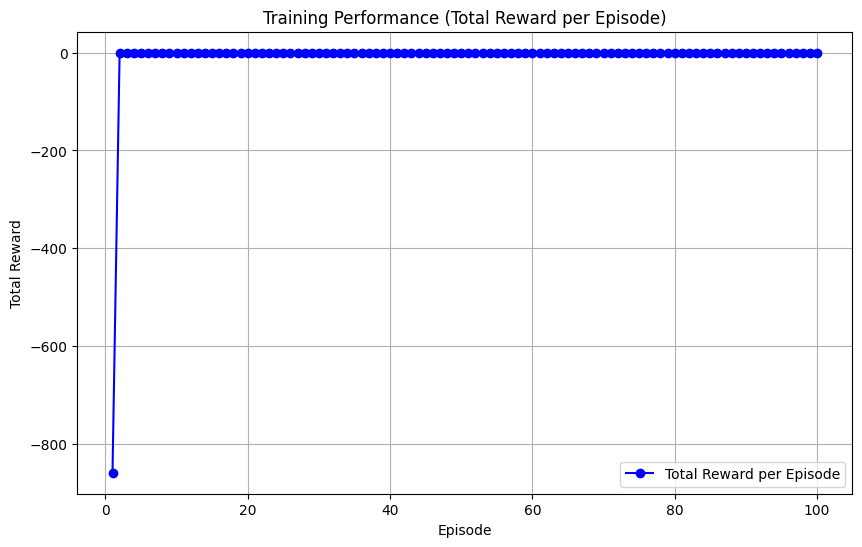

In [2]:
import traci
import numpy as np
import time
import matplotlib.pyplot as plt

# --- Constants ---
STATE_DIM = 5  # Number of state variables
ACTION_DIM = 2  # Number of possible actions
GAMMA = 0.9  # Discount factor
ALPHA = 0.1  # Learning rate
EPSILON = 0.1  # Exploration factor
NUM_EPISODES = 100 # Number of episodes to train

# Q-table initialization
q_table = np.zeros((10, 10, 10, 10, 10, ACTION_DIM))  # State space is discretized (5 states)

# --- Helper Functions ---

def get_state():
    """Fetch the current state from the simulator."""
    state = [
        traci.edge.getLastStepHaltingNumber("E5"),  # Number of halting vehicles in E5
        traci.edge.getLastStepHaltingNumber("E4"),  # Number of halting vehicles in E4
        traci.edge.getLastStepMeanSpeed("E0"),      # Average speed on E0 (highway)
        traci.edge.getWaitingTime("E4"),            # Waiting time in E4
        traci.edge.getWaitingTime("E5"),            # Waiting time in E5
    ]
    return np.array(state)

def discretize_state(state):
    """Discretize the continuous state values to fit the Q-table."""
    state_idx = []
    for i, val in enumerate(state):
        # Discretize each state component (you can adjust the number of bins)
        state_idx.append(min(int(val // 10), 9))  # 10 bins per state
    return tuple(state_idx)

def choose_action(state):
    """Epsilon-greedy policy to select an action."""
    state_idx = discretize_state(state)
    if np.random.rand() < EPSILON:
        return np.random.randint(ACTION_DIM)  # Explore: Random action
    else:
        return np.argmax(q_table[state_idx])  # Exploit: Best known action

def calculate_reward(state):
    """Calculate the reward based on traffic metrics."""
    ramp_waiting_time = state[3] + state[4]  # Total ramp waiting time (E4 + E5)
    highway_flow = state[2]  # Highway flow is the average speed on E0
    max_ramp_waiting = 1000  # Example max ramp waiting time
    max_highway_speed = 50  # Example max highway speed

    # Normalize metrics
    normalized_rwt = ramp_waiting_time / max_ramp_waiting
    normalized_hf = highway_flow / max_highway_speed
    
    # Weights
    alpha = 2.0  # Weight for ramp waiting time
    beta = 1.0   # Weight for highway flow
    
    # Basic reward
    reward = -alpha * normalized_rwt + beta * normalized_hf 
    
    # Penalty for extreme congestion (e.g., when ramp waiting time exceeds 80% of max)
    if ramp_waiting_time > max_ramp_waiting * 0.8:
        reward -= 10  # Strong penalty for high congestion
    
    return reward

def update_q_table(state, action, reward, next_state):
    """Update the Q-table using the Q-learning rule."""
    state_idx = discretize_state(state)
    next_state_idx = discretize_state(next_state)
    
    # Q-learning update rule
    best_next_action = np.argmax(q_table[next_state_idx])
    q_table[state_idx + (action,)] = q_table[state_idx + (action,)] + ALPHA * (
        reward + GAMMA * q_table[next_state_idx + (best_next_action,)] - q_table[state_idx + (action,)]
    )

# --- Training Loop ---
traci.start(["sumo", "-c", r"C:\Users\lenovo\Desktop\Projet RL\sumo_config\simulation.sumocfg"])  # Update with your SUMO config file
episode_rewards = []  # To store rewards per episode

for episode in range(NUM_EPISODES):
    state = get_state()
    total_reward = 0
    
    while traci.simulation.getMinExpectedNumber() > 0:
        action = choose_action(state)
        traci.trafficlight.setPhase("J7", action)  # Apply action (update traffic light phase)
        traci.simulationStep()  # Step simulation
        
        next_state = get_state()
        
        # Calculate reward based on traffic metrics
        reward = calculate_reward(state)
        
        # Update Q-table
        update_q_table(state, action, reward, next_state)
        
        state = next_state
        total_reward += reward
        
        # Check for termination condition (if needed)
        if traci.simulation.getTime() > 1000:  # End after 1000 seconds
            break
    
    episode_rewards.append(total_reward)  # Store total reward for the episode
    print(f"Episode {episode + 1}/{NUM_EPISODES}, Total Reward: {total_reward}")

# --- Visualization ---
plt.figure(figsize=(10, 6))
plt.plot(range(1, NUM_EPISODES + 1), episode_rewards, label="Total Reward per Episode", color="blue", marker="o")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("Training Performance (Total Reward per Episode)")
plt.legend()
plt.grid(True)
plt.show()

# Close SUMO connection
traci.close()


Episode 1/100, Total Reward: -794.3937038890668
Episode 2/100, Total Reward: 0
Episode 3/100, Total Reward: 0
Episode 4/100, Total Reward: 0
Episode 5/100, Total Reward: 0
Episode 6/100, Total Reward: 0
Episode 7/100, Total Reward: 0
Episode 8/100, Total Reward: 0
Episode 9/100, Total Reward: 0
Episode 10/100, Total Reward: 0
Episode 11/100, Total Reward: 0
Episode 12/100, Total Reward: 0
Episode 13/100, Total Reward: 0
Episode 14/100, Total Reward: 0
Episode 15/100, Total Reward: 0
Episode 16/100, Total Reward: 0
Episode 17/100, Total Reward: 0
Episode 18/100, Total Reward: 0
Episode 19/100, Total Reward: 0
Episode 20/100, Total Reward: 0
Episode 21/100, Total Reward: 0
Episode 22/100, Total Reward: 0
Episode 23/100, Total Reward: 0
Episode 24/100, Total Reward: 0
Episode 25/100, Total Reward: 0
Episode 26/100, Total Reward: 0
Episode 27/100, Total Reward: 0
Episode 28/100, Total Reward: 0
Episode 29/100, Total Reward: 0
Episode 30/100, Total Reward: 0
Episode 31/100, Total Reward: 0


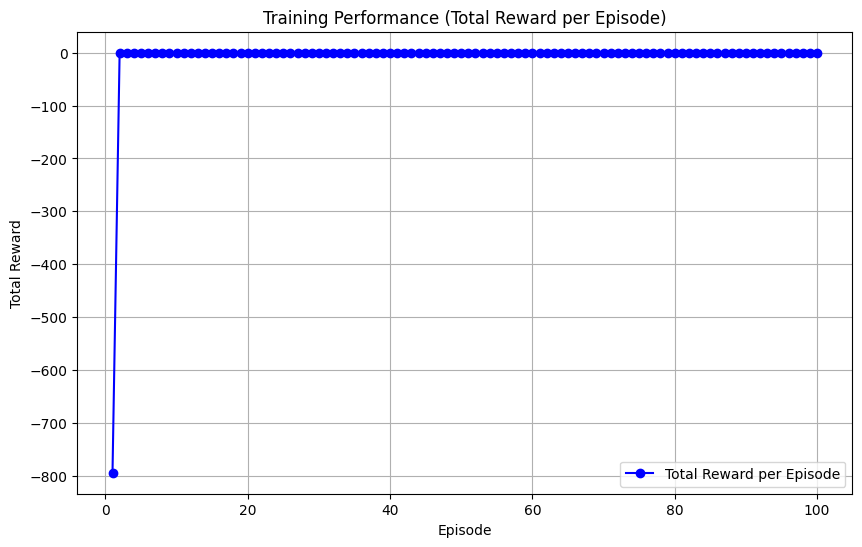

In [4]:
import traci
import numpy as np
import time
import matplotlib.pyplot as plt
import pickle  # For saving and loading the Q-table

# --- Constants ---
STATE_DIM = 5  # Number of state variables
ACTION_DIM = 2  # Number of possible actions
GAMMA = 0.9  # Discount factor
ALPHA = 0.1  # Learning rate
EPSILON = 0.1  # Exploration factor
NUM_EPISODES = 100  # Number of episodes to train
Q_TABLE_FILE = "q_table.pkl"  # File to save/load the Q-table

# Q-table initialization
q_table = np.zeros((10, 10, 10, 10, 10, ACTION_DIM))  # State space is discretized (5 states)

# --- Helper Functions ---

def get_state():
    """Fetch the current state from the simulator."""
    state = [
        traci.edge.getLastStepHaltingNumber("E5"),  # Number of halting vehicles in E5
        traci.edge.getLastStepHaltingNumber("E4"),  # Number of halting vehicles in E4
        traci.edge.getLastStepMeanSpeed("E0"),      # Average speed on E0 (highway)
        traci.edge.getWaitingTime("E4"),            # Waiting time in E4
        traci.edge.getWaitingTime("E5"),            # Waiting time in E5
    ]
    return np.array(state)

def discretize_state(state):
    """Discretize the continuous state values to fit the Q-table."""
    state_idx = []
    for i, val in enumerate(state):
        # Discretize each state component (you can adjust the number of bins)
        state_idx.append(min(int(val // 10), 9))  # 10 bins per state
    return tuple(state_idx)

def choose_action(state):
    """Epsilon-greedy policy to select an action."""
    state_idx = discretize_state(state)
    if np.random.rand() < EPSILON:
        return np.random.randint(ACTION_DIM)  # Explore: Random action
    else:
        return np.argmax(q_table[state_idx])  # Exploit: Best known action

def calculate_reward(state):
    """Calculate the reward based on traffic metrics."""
    ramp_waiting_time = state[3] + state[4]  # Total ramp waiting time (E4 + E5)
    highway_flow = state[2]  # Highway flow is the average speed on E0
    max_ramp_waiting = 1000  # Example max ramp waiting time
    max_highway_speed = 50  # Example max highway speed

    # Normalize metrics
    normalized_rwt = ramp_waiting_time / max_ramp_waiting
    normalized_hf = highway_flow / max_highway_speed
    
    # Weights
    alpha = 2.0  # Weight for ramp waiting time
    beta = 1.0   # Weight for highway flow
    
    # Basic reward
    reward = -alpha * normalized_rwt + beta * normalized_hf 
    
    # Penalty for extreme congestion (e.g., when ramp waiting time exceeds 80% of max)
    if ramp_waiting_time > max_ramp_waiting * 0.8:
        reward -= 10  # Strong penalty for high congestion
    
    return reward

def update_q_table(state, action, reward, next_state):
    """Update the Q-table using the Q-learning rule."""
    state_idx = discretize_state(state)
    next_state_idx = discretize_state(next_state)
    
    # Q-learning update rule
    best_next_action = np.argmax(q_table[next_state_idx])
    q_table[state_idx + (action,)] = q_table[state_idx + (action,)] + ALPHA * (
        reward + GAMMA * q_table[next_state_idx + (best_next_action,)] - q_table[state_idx + (action,)]
    )

def save_q_table(file_path):
    """Save the Q-table to a file."""
    with open(file_path, "wb") as file:
        pickle.dump(q_table, file)
    print(f"Q-table saved to {file_path}")

def load_q_table(file_path):
    """Load the Q-table from a file."""
    global q_table
    with open(file_path, "rb") as file:
        q_table = pickle.load(file)
    print(f"Q-table loaded from {file_path}")

# --- Training Loop ---
traci.start(["sumo", "-c", r"C:\Users\lenovo\Desktop\Projet RL\sumo_config\simulation.sumocfg"])  # Update with your SUMO config file
episode_rewards = []  # To store rewards per episode

for episode in range(NUM_EPISODES):
    state = get_state()
    total_reward = 0
    
    while traci.simulation.getMinExpectedNumber() > 0:
        action = choose_action(state)
        traci.trafficlight.setPhase("J7", action)  # Apply action (update traffic light phase)
        traci.simulationStep()  # Step simulation
        
        next_state = get_state()
        
        # Calculate reward based on traffic metrics
        reward = calculate_reward(state)
        
        # Update Q-table
        update_q_table(state, action, reward, next_state)
        
        state = next_state
        total_reward += reward
        
        # Check for termination condition (if needed)
        if traci.simulation.getTime() > 1000:  # End after 1000 seconds
            break
    
    episode_rewards.append(total_reward)  # Store total reward for the episode
    print(f"Episode {episode + 1}/{NUM_EPISODES}, Total Reward: {total_reward}")

# Save Q-table after training
save_q_table(Q_TABLE_FILE)

# --- Visualization ---
plt.figure(figsize=(10, 6))
plt.plot(range(1, NUM_EPISODES + 1), episode_rewards, label="Total Reward per Episode", color="blue", marker="o")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("Training Performance (Total Reward per Episode)")
plt.legend()
plt.grid(True)
plt.show()

# Close SUMO connection
traci.close()

